In [90]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import numpy as np
import utils
import calplot

df= pd.read_csv('C:/Users/Mads Emil/Downloads/Motor_Vehicle_Collisions_-_Crashes_20240416.csv')
# Apply the lowercase function to string columns
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#data type and shorting
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df = df.sort_values(by='CRASH DATE')


#Removing years 2012 and 2024
df['YEAR'] = df['CRASH DATE'].dt.year
df = df[(df['YEAR'] != 2012) & (df['YEAR'] != 2024)]


C:\Users\Mads Emil\AppData\Local\Temp\ipykernel_29728\81901594.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/Mads Emil/Downloads/Motor_Vehicle_Collisions_-_Crashes_20240416.csv')


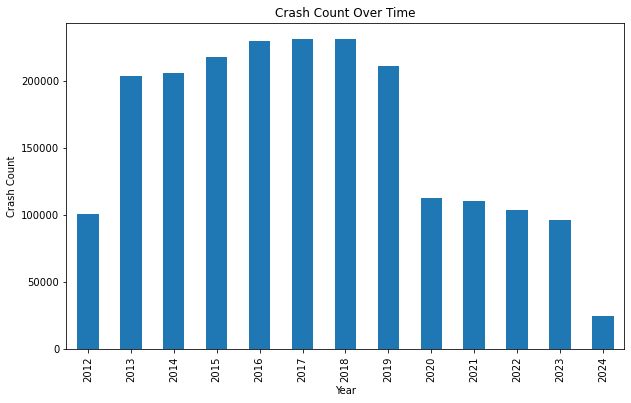

In [10]:
#Change date column into date format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
#Create year column
df['Year'] = df['CRASH DATE'].dt.year


# Change date column into date format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

# Create year column
df['Year'] = df['CRASH DATE'].dt.year

# Sort the DataFrame by the 'Year' column
df_sorted = df.sort_values(by='Year')

# Count the occurrences of each year and plot
year_counts = df_sorted["Year"].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(10, 6))

# Set plot labels and title
plt.title('Crash Count Over Time')
plt.xlabel('Year')
plt.ylabel('Crash Count')

# Show the plot
plt.show()

In [ ]:
# Specify the value(s) to cut out as a list
values_to_cut_out = [0]

# Create a boolean mask indicating which rows to keep
mask = ~df['Contributeing '].isin(values_to_cut_out)

# Apply the mask to the DataFrame to filter out rows
Alk_df = df[mask]

In [11]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Year'],
      dtype='object')

In [16]:
df["NUMBER OF PEDESTRIANS KILLED"].value_counts()

0    2078988
1       1513
2         12
6          1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

In [17]:
filtered_df["NUMBER OF PEDESTRIANS KILLED"].value_counts()

1    1513
2      12
6       1
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

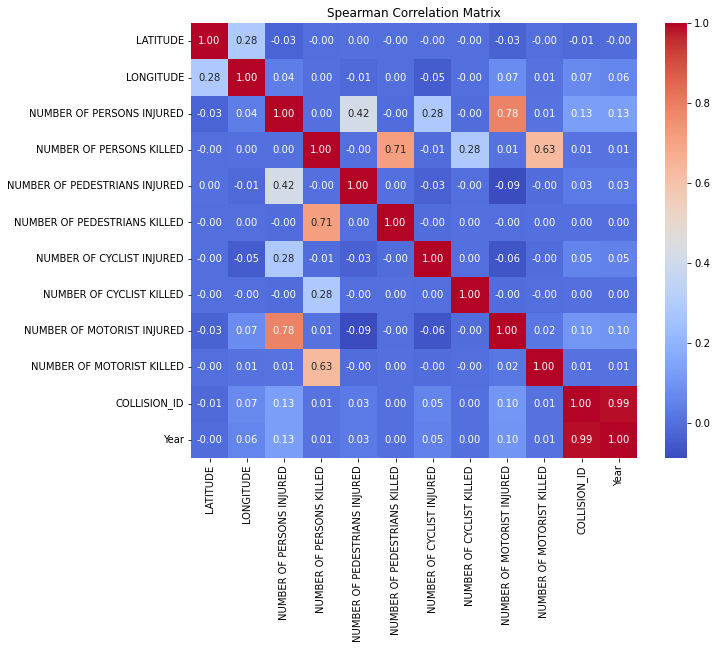

In [18]:
# Compute the Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

# Plot the color matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

<AxesSubplot:>

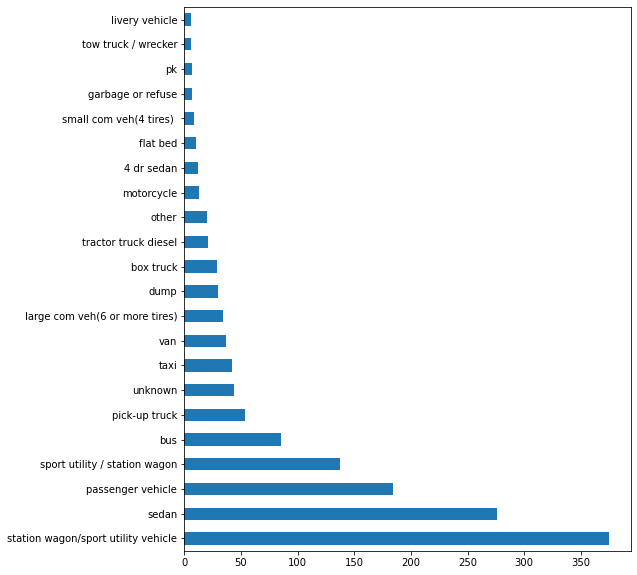

In [19]:
filtered_df["VEHICLE TYPE CODE 1"].value_counts()[:22].plot(kind='barh', figsize = (8,10))

Now it time to clean the data even more: for loop for sorting/combineing the types "sport utility / station wagon" and station wagon/sport utility vehicle

In [20]:
## for loop for sorting/combineing the types "sport utility / station wagon" and station wagon/sport utility vehicle
for num in range(1,6):

    df[f'VEHICLE TYPE CODE {num}'] = df[f'VEHICLE TYPE CODE {num}'].replace('sport utility / station wagon', 'station wagon/sport utility vehicle')

    df["VEHICLE TYPE CODE 1"].value_counts()[:40]

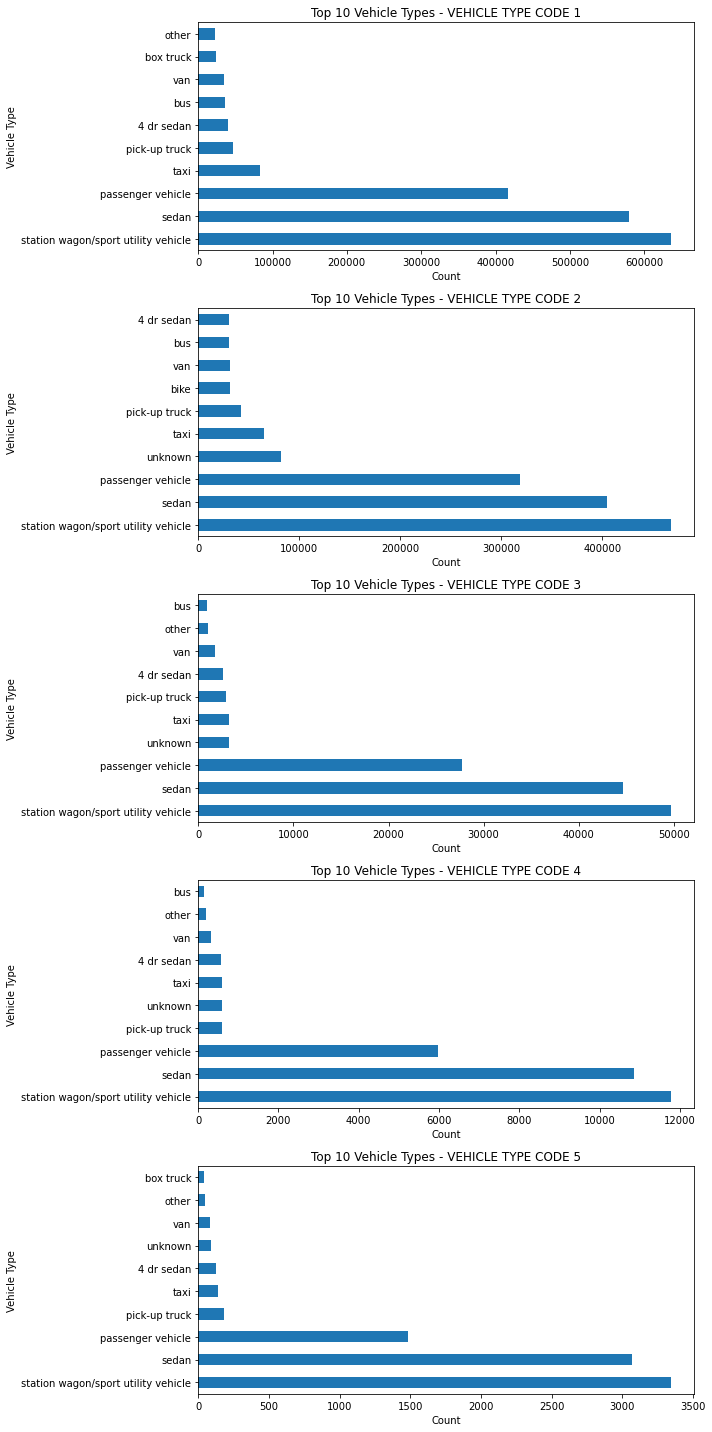

In [21]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for plot in range(1, 6):
    df[f"VEHICLE TYPE CODE {plot}"].value_counts()[:10].plot(kind='barh', ax=axes[plot-1])
    axes[plot-1].set_title(f"Top 10 Vehicle Types - VEHICLE TYPE CODE {plot}")
    axes[plot-1].set_xlabel("Count")
    axes[plot-1].set_ylabel("Vehicle Type")

plt.tight_layout()
plt.show()   

<AxesSubplot:>

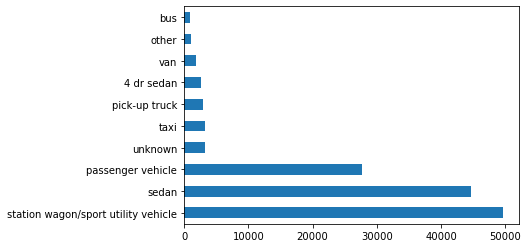

In [22]:
df["VEHICLE TYPE CODE 3"].value_counts()[:10].plot(kind='barh')

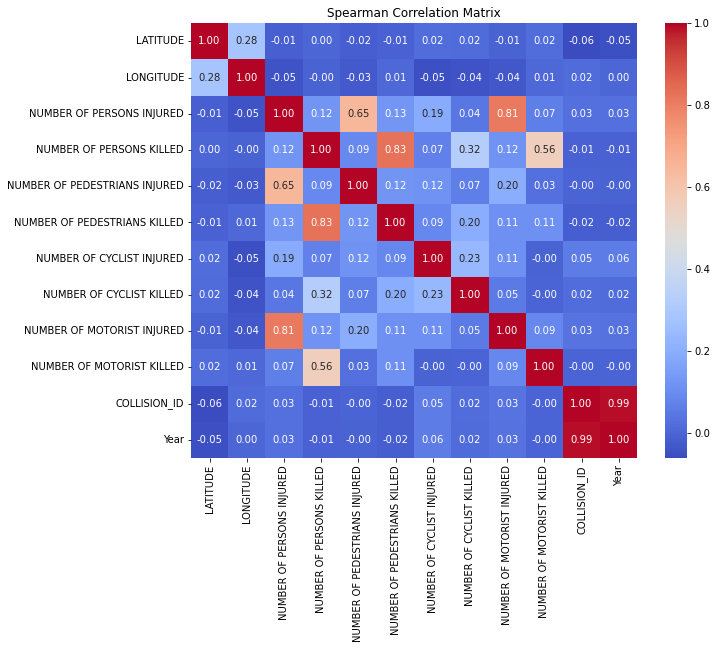

In [23]:
# Compute the Spearman correlation matrix
spearman_corr_matrix = filtered_df.corr(method='spearman')

# Plot the color matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

In [24]:
# Specify the value(s) to cut out
values_to_cut_out = [0]

# Create a boolean mask indicating which rows to keep
mask = ~df['NUMBER OF PEDESTRIANS KILLED'].isin(values_to_cut_out)

# Apply the mask to the DataFrame to filter out rows
filtered_df = df[mask]

In [25]:
filtered_df["VEHICLE TYPE CODE 1"].value_counts()[:4]

station wagon/sport utility vehicle    512
sedan                                  276
passenger vehicle                      184
bus                                     85
Name: VEHICLE TYPE CODE 1, dtype: int64

In [26]:
kill_ratio_Station_car = 521/635602*100
print("Station car kills:", kill_ratio_Station_car)

kill_ratio_sedan_car = 276/578949*100
print("Sedan car kills:", kill_ratio_sedan_car)

Station car kills: 0.08196953439416489
Sedan car kills: 0.04767259292269267


<AxesSubplot:>

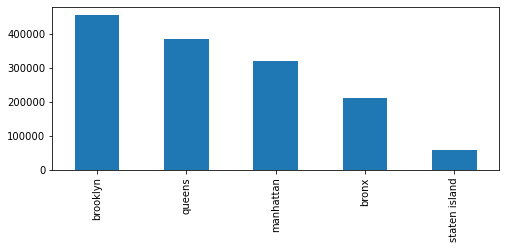

In [27]:
df["BOROUGH"].value_counts()[:70].plot(kind='bar', figsize = (8,3))

<AxesSubplot:>

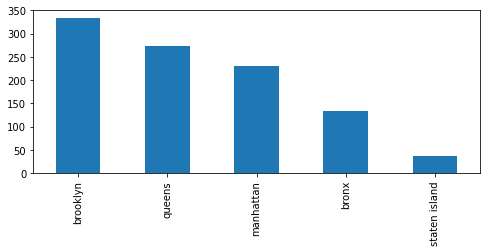

In [50]:
filtered_df["BOROUGH"].value_counts()[:70].plot(kind='bar', figsize = (8,3))

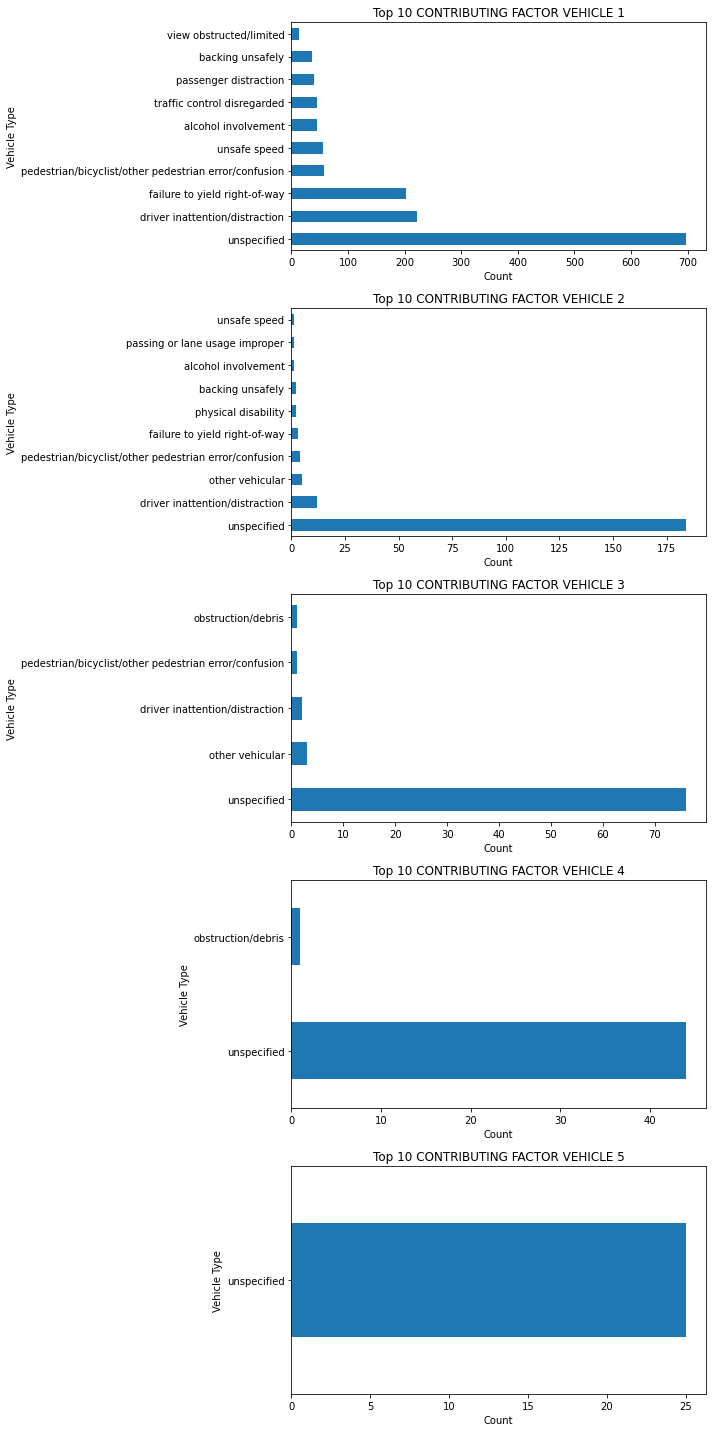

In [28]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for plot in range(1, 6):
    filtered_df[f"CONTRIBUTING FACTOR VEHICLE {plot}"].value_counts()[:10].plot(kind='barh', ax=axes[plot-1])
    axes[plot-1].set_title(f"Top 10 CONTRIBUTING FACTOR VEHICLE {plot}")
    axes[plot-1].set_xlabel("Count")
    axes[plot-1].set_ylabel("Vehicle Type")

plt.tight_layout()
plt.show()   

In [29]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:40]

unspecified                                              708007
driver inattention/distraction                           416511
failure to yield right-of-way                            123651
following too closely                                    111245
backing unsafely                                          76869
other vehicular                                           64559
passing or lane usage improper                            58055
passing too closely                                       51804
turning improperly                                        51372
fatigued/drowsy                                           47406
unsafe lane changing                                      40870
traffic control disregarded                               36987
driver inexperience                                       32622
unsafe speed                                              29329
alcohol involvement                                       22829
lost consciousness                      

In [30]:
print(708007/2080000)

0.34038798076923077


<AxesSubplot:>

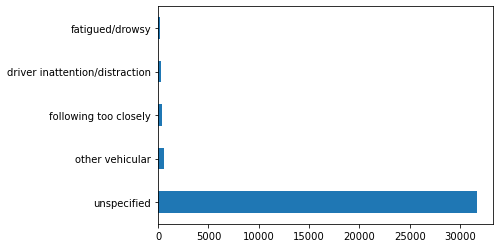

In [31]:
#Takes the colume named [Category] and counts the occurencys at for the [.x] most occ. categorys, and plot it in kind =" bar or barh for rotateing the barchart
df["CONTRIBUTING FACTOR VEHICLE 4"].value_counts()[:5].plot(kind='barh')

In [32]:
df["ON STREET NAME"].describe(include="all")

count                              1638486
unique                               15918
top       broadway                        
freq                                 17349
Name: ON STREET NAME, dtype: object

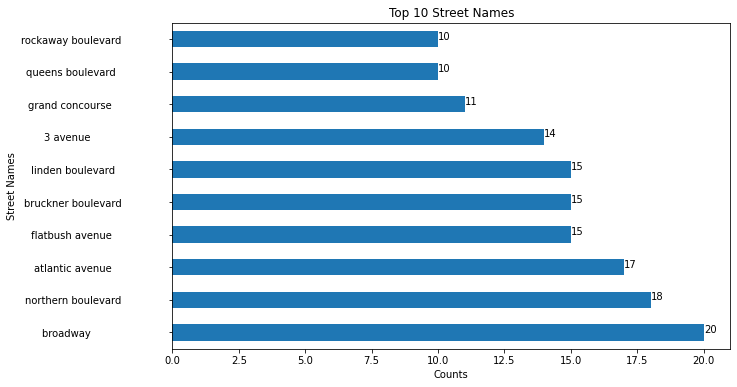

In [47]:
# Sample data
street_counts = filtered_df["ON STREET NAME"].value_counts()[:10]

# Create horizontal bar plot
plt.figure(figsize=[10, 6])
street_counts.plot(kind='barh')

# Add text to each bar with aligned text
for i, count in enumerate(street_counts):
    plt.text(count, i, str(count), ha='left')

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Street Names')
plt.title('Top 10 Street Names')

# Show plot
plt.show()

In [34]:
df["ON STREET NAME"].value_counts()[:20]

broadway                            17349
atlantic avenue                     15358
belt parkway                        13604
3 avenue                            12486
northern boulevard                  11974
long island expressway               9942
brooklyn queens expressway           9761
flatbush avenue                      9756
linden boulevard                     9603
queens boulevard                     9382
2 avenue                             9028
grand central pkwy                   8883
bruckner boulevard                   8191
fdr drive                            7533
5 avenue                             6777
jamaica avenue                       6753
cross bronx expy                     6332
major deegan expressway              6187
7 avenue                             5983
8 avenue                             5935
Name: ON STREET NAME, dtype: int64

The city’s current default 25 mph speed limit was set in 2014, marking the first citywide reduction in a half-century. The 2014 shift was pushed by then-Mayor Bill de Blasio and approved by the Legislature and former Gov. Andrew Cuomo.
https://www.governing.com/policy/legislation-would-allow-nyc-to-set-its-own-speed-limits



## Calender plot

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,whitestone expressway,20 avenue,NaN,...,unspecified,NaN,NaN,NaN,4455765,sedan,sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,queensboro bridge upper,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,throgs neck bridge,NaN,NaN,...,unspecified,NaN,NaN,NaN,4541903,sedan,pick-up truck,NaN,NaN,NaN
3,09/11/2021,9:35,brooklyn,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 loring avenue,...,NaN,NaN,NaN,NaN,4456314,sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,brooklyn,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",saratoga avenue,decatur street,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080509,04/12/2024,16:40,NaN,NaN,NaN,NaN,NaN,todt hill road,cromwell circle,NaN,...,unspecified,NaN,NaN,NaN,4716832,sedan,station wagon/sport utility vehicle,NaN,NaN,NaN
2080510,04/12/2024,17:08,brooklyn,11218.0,40.638706,-73.971600,"(40.638706, -73.9716)",NaN,NaN,709 cortelyou road,...,unspecified,NaN,NaN,NaN,4716739,sedan,sedan,NaN,NaN,NaN
2080511,03/28/2024,3:04,NaN,NaN,40.790850,-73.981520,"(40.79085, -73.98152)",henry hudson parkway,NaN,NaN,...,NaN,NaN,NaN,NaN,4717277,sedan,NaN,NaN,NaN,NaN
2080512,04/12/2024,7:53,staten island,10306.0,40.579765,-74.103806,"(40.579765, -74.103806)",bedford avenue,husson street,NaN,...,driver inattention/distraction,NaN,NaN,NaN,4716607,station wagon/sport utility vehicle,sedan,NaN,NaN,NaN


(<Figure size 900x1346.4 with 12 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

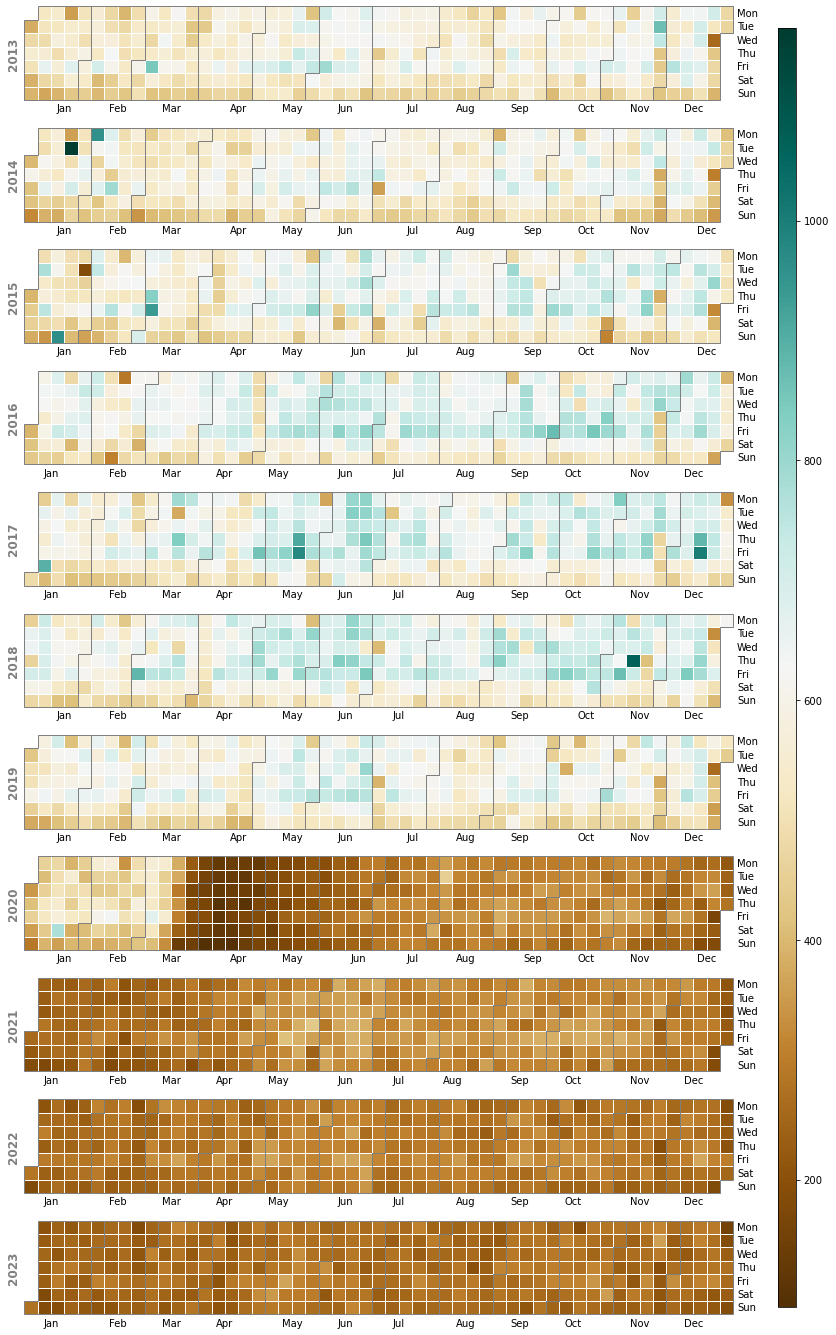

In [66]:
#Selecting the category and obtaining values of occ per Date
#PROSTITUTION_df = df.loc[df.Category=="PROSTITUTION"]

date_counts = df["CRASH DATE"].value_counts()

# Convert the index to dattime format
date_counts.index = pd.to_datetime(date_counts.index)

# Resample the data to daily frequency and fill missing dates
daily_counts = date_counts.resample('D').first()

interpolated_counts = daily_counts.interpolate() 
final_counts = interpolated_counts.head(len(daily_counts))

#round the final_counts
final_counts = final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="BrBG", dropzero=False)

(<Figure size 900x1346.4 with 12 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

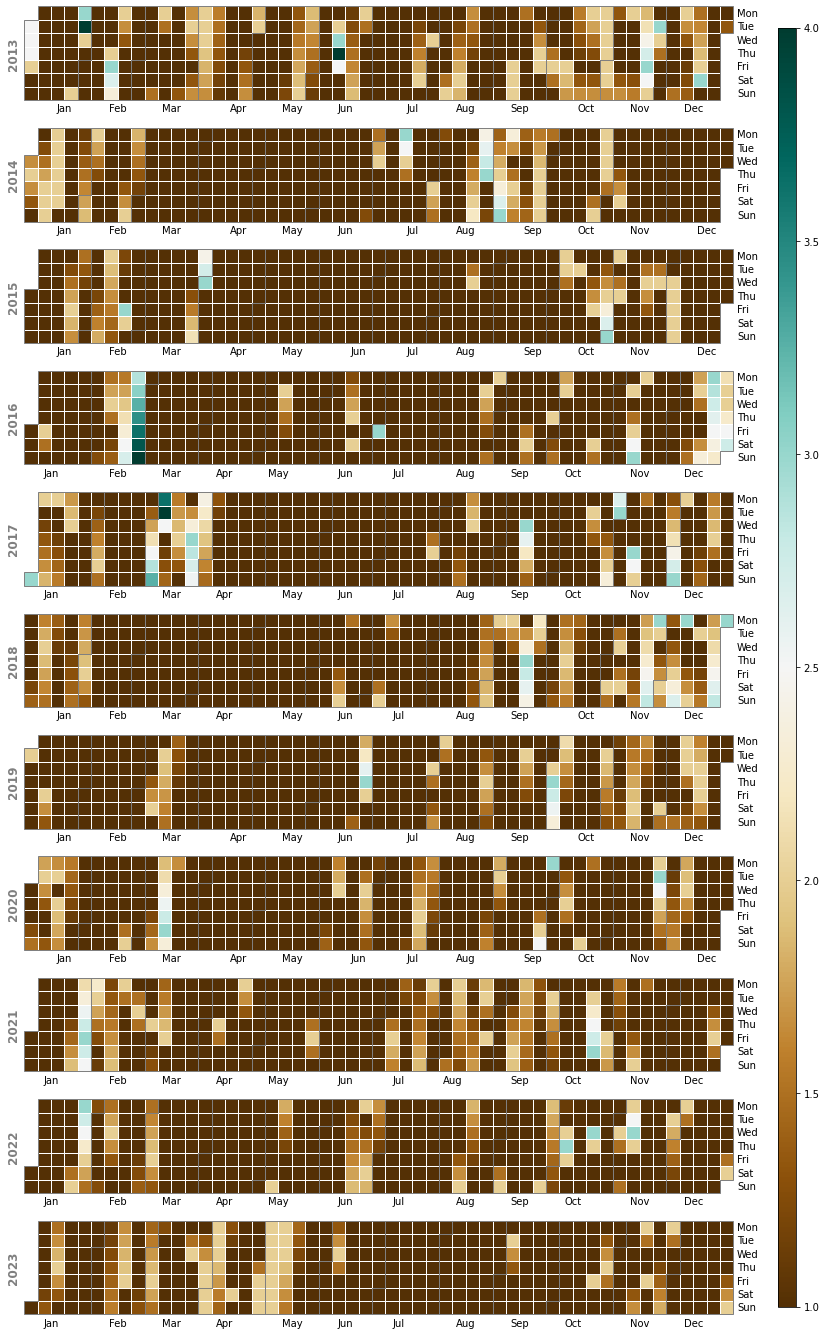

In [74]:
#Selecting the category and obtaining values of occ per Date
#PROSTITUTION_df = df.loc[df.Category=="PROSTITUTION"]

f_date_counts = filtered_df["CRASH DATE"].value_counts()

# Convert the index to dattime format
f_date_counts.index = pd.to_datetime(f_date_counts.index)

# Resample the data to daily frequency and fill missing dates
f_daily_counts = f_date_counts.resample('D').first()

interpolated_counts = f_daily_counts.interpolate() 
f_final_counts = interpolated_counts.head(len(f_daily_counts))

#round the final_counts
f_final_counts = f_final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(f_final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="BrBG", dropzero=False)

(<Figure size 900x1346.4 with 12 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>,
        <AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>,
        <AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

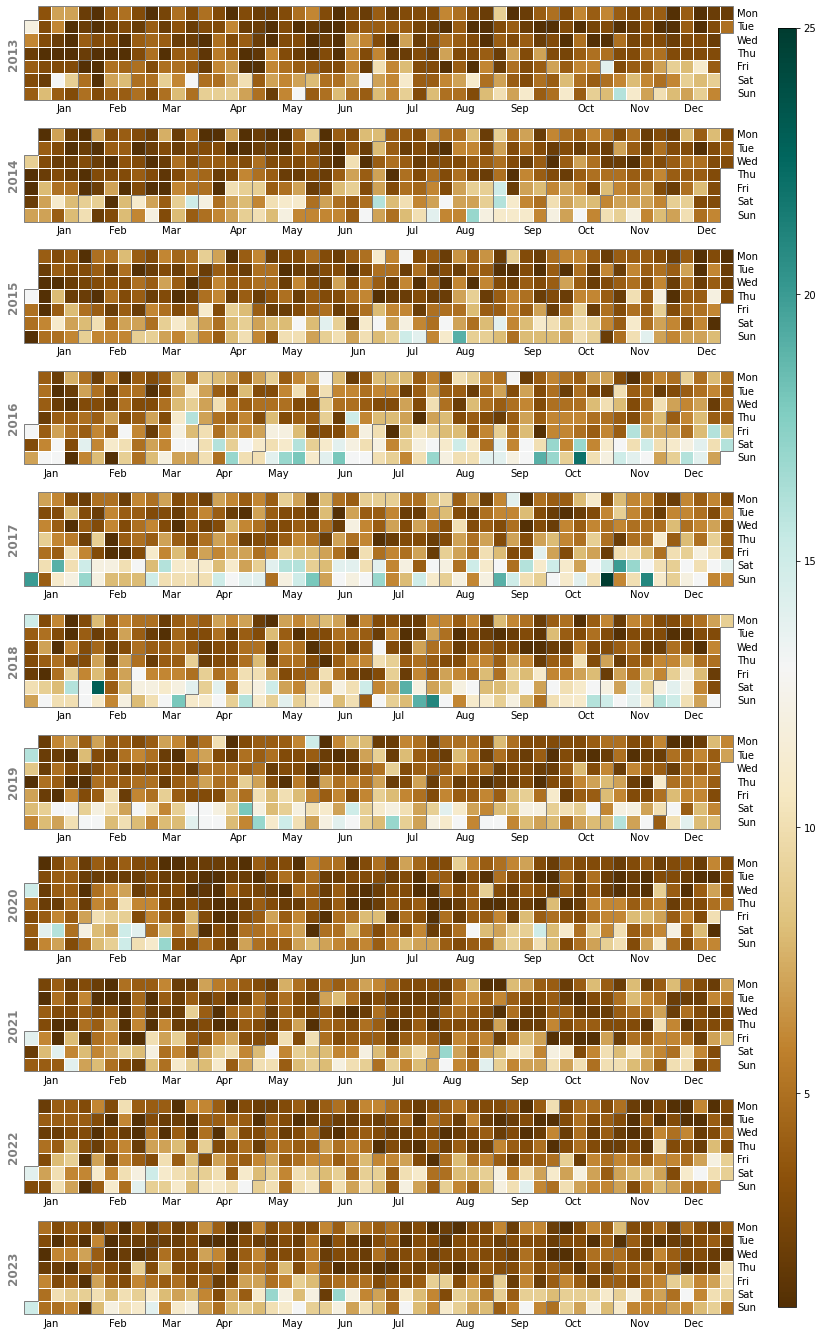

In [95]:
#Selecting the category and obtaining values of occ per Date
#PROSTITUTION_df = df.loc[df.Category=="PROSTITUTION"]

Alk_date_counts = Alk_df["CRASH DATE"].value_counts()

# Convert the index to dattime format
Alk_date_counts.index = pd.to_datetime(Alk_date_counts.index)

# Resample the data to daily frequency and fill missing dates
Alk_daily_counts = Alk_date_counts.resample('D').first()

interpolated_counts = Alk_daily_counts.interpolate() 
Alk_final_counts = interpolated_counts.head(len(Alk_daily_counts))

#round the final_counts
Alk_final_counts = Alk_final_counts.round(3)

#plot using the calplot  package 
calplot.calplot(Alk_final_counts, yearlabel_kws=dict({'fontname':'sans-serif'}, fontsize=12), cmap="BrBG", dropzero=False)

In [93]:
# Create a boolean mask indicating which rows to keep
mask = (df['CONTRIBUTING FACTOR VEHICLE 1'] == "alcohol involvement")

# Apply the mask to the DataFrame to filter out rows
Alk_df = df[mask]

In [94]:
Alk_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR
1822363,2013-01-01,3:10,NaN,NaN,NaN,NaN,NaN,pitkin avenue,howard avenue,NaN,...,NaN,NaN,NaN,161083,passenger vehicle,passenger vehicle,NaN,NaN,NaN,2013
1835490,2013-01-01,6:15,NaN,NaN,40.732941,-73.920382,"(40.7329414, -73.9203819)",NaN,NaN,NaN,...,unspecified,unspecified,NaN,3045083,passenger vehicle,passenger vehicle,passenger vehicle,passenger vehicle,NaN,2013
1834667,2013-01-01,3:26,queens,11426,40.735953,-73.714738,"(40.7359534, -73.7147376)",253 street,hillside avenue,NaN,...,unspecified,NaN,NaN,221921,sport utility / station wagon,passenger vehicle,sport utility / station wagon,NaN,NaN,2013
1825962,2013-01-01,5:43,brooklyn,11205,40.696208,-73.961586,"(40.6962076, -73.9615863)",classon avenue,park avenue,NaN,...,NaN,NaN,NaN,192309,passenger vehicle,passenger vehicle,NaN,NaN,NaN,2013
1829725,2013-01-01,2:05,manhattan,10065,40.761857,-73.963425,"(40.7618573, -73.9634255)",2 avenue,east 61 street,NaN,...,NaN,NaN,NaN,47042,other,van,NaN,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055805,2023-12-31,20:06,staten island,10312.0,40.541656,-74.166100,"(40.541656, -74.1661)",amboy road,waimer place,NaN,...,NaN,NaN,NaN,4691542,station wagon/sport utility vehicle,station wagon/sport utility vehicle,NaN,NaN,NaN,2023
2055763,2023-12-31,12:45,queens,11377.0,40.739983,-73.903120,"(40.739983, -73.90312)",NaN,NaN,46-10 61 street,...,NaN,NaN,NaN,4691935,station wagon/sport utility vehicle,NaN,NaN,NaN,NaN,2023
2055780,2023-12-31,1:00,brooklyn,11233.0,40.670895,-73.914050,"(40.670895, -73.91405)",boyland street,east new york avenue,NaN,...,NaN,NaN,NaN,4691308,pick-up truck,sedan,NaN,NaN,NaN,2023
2055854,2023-12-31,22:30,queens,11377.0,40.742943,-73.916850,"(40.742943, -73.91685)",48 street,queens boulevard,NaN,...,NaN,NaN,NaN,4691875,station wagon/sport utility vehicle,NaN,NaN,NaN,NaN,2023
